# Лабораторна робота №3. Кластеризацій. Аналіз даних.

У цій лабораторній завданням буде розділити вина по сегментах користувачів.
__Важливо відмітити, що у датасеті, який буде використовуватись є відмітки, до якого сегменту відноситься вино, але вони не будуть використовуватись.__

#### Імпортуйте бібліотеки pandas, matplotlib та класс KMeans з бібліотеки sklearn.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


#### Зчитайте дані з файлу `wine.csv` у датафрейм `wine`

In [4]:
# ваш код тут
df = pd.read_csv('wine.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


#### Побудуйте точоковий графік з отриманого датафрейму, де по осі `x` розташовані значення `Alcohol`, а по осі `y` значення `Proline`.

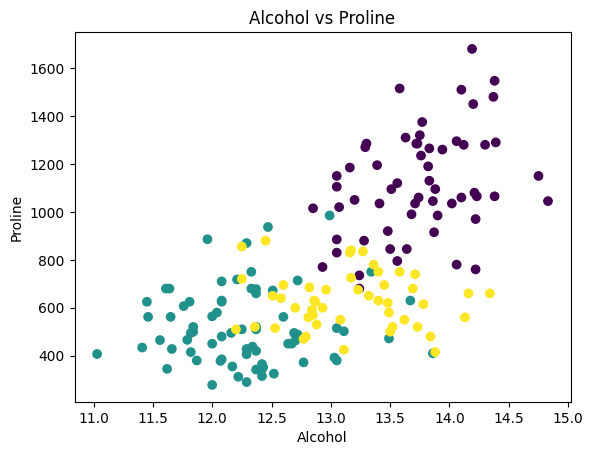

In [ ]:
# ваш код тут 
plt.scatter(df['Alcohol'], df['Proline'], c= df['Customer_Segment'])
plt.title('Alcohol vs Proline')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.show()


<AxesSubplot:xlabel='Alcohol', ylabel='Proline'>

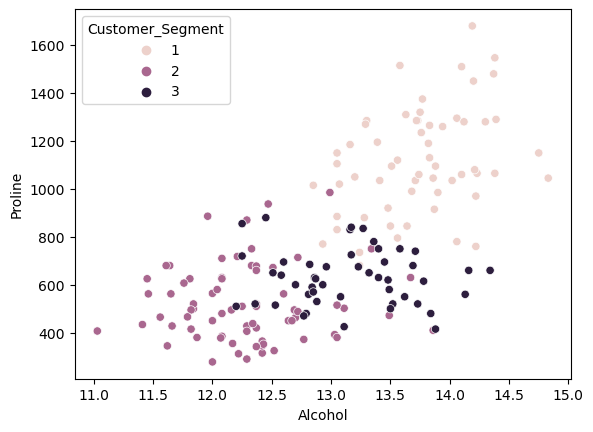

#### Побудуйте точоковий графік з отриманого датафрейму, де по осі `x` розташовані значення `Proline` а по осі `y` значення `OD280`.

In [ ]:
# ваш код тут

<AxesSubplot:xlabel='Proline', ylabel='OD280'>

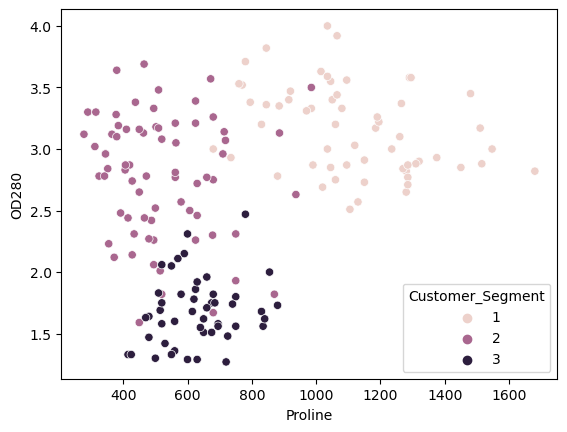

## K-Means.

#### Імпортуйте клас KMeans з бібілотеки sklearn.

#### Створіть об'єкт класу KMeans з трьома кластерами. У конструктор передайте параметр  random_state=32, щоб мати однакові параметри ініціалізації центроїдів з прикладами.


In [ ]:
# ваш код тут

KMeans(n_clusters=3, random_state=32)

#### Натренуйте модель на даних з датафрейму. Виведіть значення поля labels_ з отриманого результату.

In [ ]:
# ваш код тут

KMeans(n_clusters=3, random_state=32)

#### Виведіть отримані центри кластерів.

In [ ]:
# ваш код тут

array([[1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02, 2.25806452e+00],
       [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03, 1.02127660e+00],
       [1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02, 2.27536232e+00]])

#### Побудуйте точкові графіки порівняння кластерів, отриманих з використанням K-Means та справжніх результатів. По осі _x_ задайте значення  _Proline_ а по осі _y_ значення _OD280_. Для розподілу по кластерах використайте параметр __c=__ з функції _scatter_.

In [ ]:
# ваш код тут

Text(0, 0.5, 'OD280')

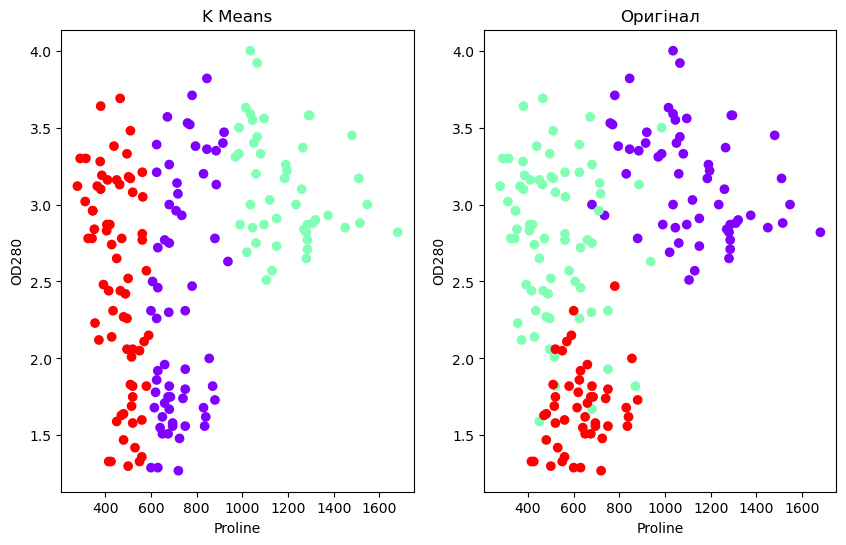

#### Побудуйте точкові графіки порівняння кластерів, отриманих з використанням K-Means та справжніх результатів. По осі _x_ задайте значення  _Alcohol_ а по осі _y_ значення _Proline_. Для розподілу по кластерах використайте параметр __c=__ з функції _scatter_.

In [ ]:
# ваш код тут

Text(0, 0.5, 'Proline')

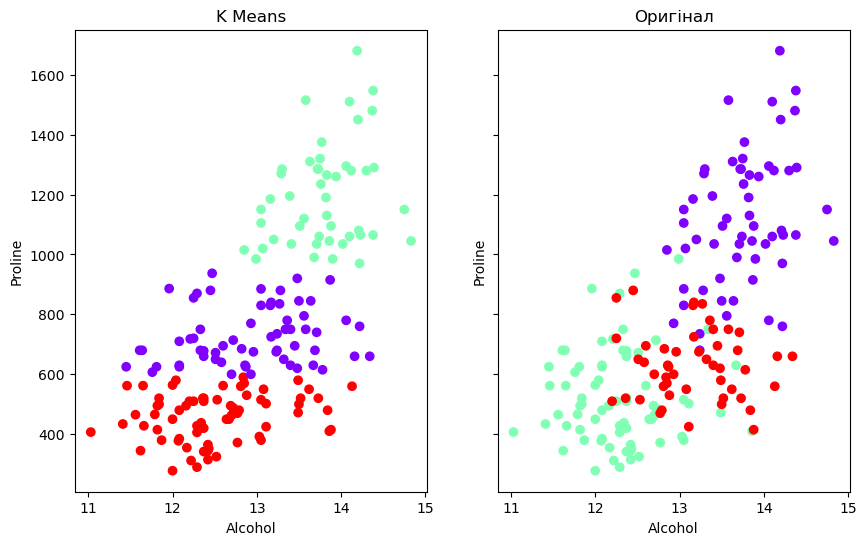

# Агломеративна кластеризація.

#### Імпортуйте клас AgglomerativeClustering з бібілотеки sklearn.

#### Створіть об'єкт класу AgglomerativeClustering з трьома кластерами. 

In [ ]:
# ваш код тут

AgglomerativeClustering(n_clusters=3)

#### Натренуйте кластеризатор даними з датафрейму з винами.

In [ ]:
# ваш код тут

AgglomerativeClustering(n_clusters=3)

#### Побудуйте точкові графіки порівняння кластерів, отриманих з використанням K-Means та справжніх результатів. По осі _x_ задайте значення  _Proline_ а по осі _y_ значення _OD280_. Для розподілу по кластерах використайте параметр __c=__ з функції _scatter_.

In [ ]:
# ваш код тут

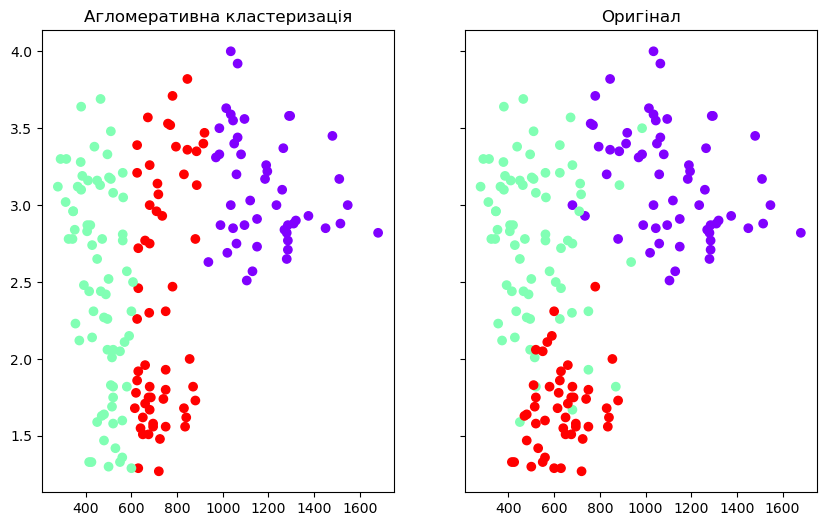

#### Побудуйте точкові графіки порівняння кластерів, отриманих з використанням K-Means та справжніх результатів. По осі _x_ задайте значення  _Alcohol_ а по осі _y_ значення _Proline_. Для розподілу по кластерах використайте параметр __c=__ з функції _scatter_.

In [ ]:
# ваш код тут

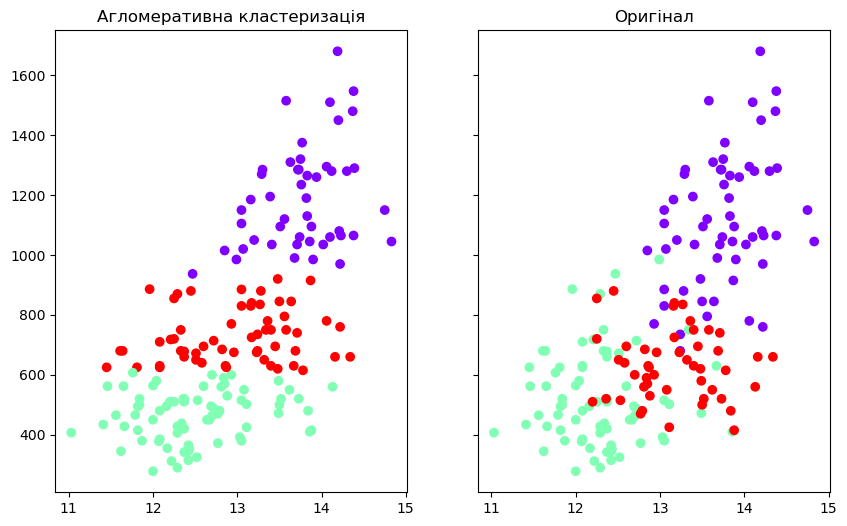

### Дендрограми.

#### Імпортуйте клас `hierarchy` для побудови дендрограм.

#### Побудуйте дендрограму для даних про вина.

In [ ]:
# ваш код тут

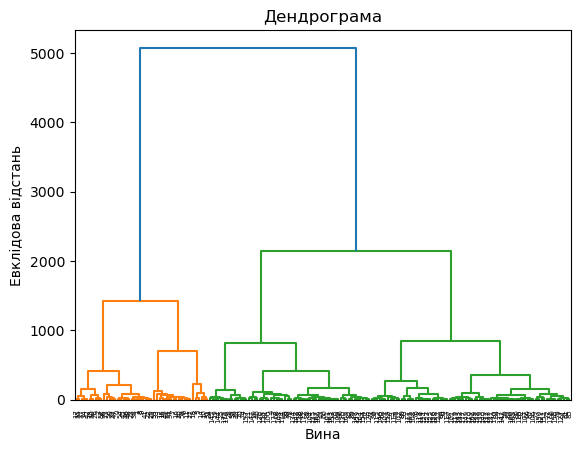

# DBSCAN

Дані для цієї частини лабораторної:

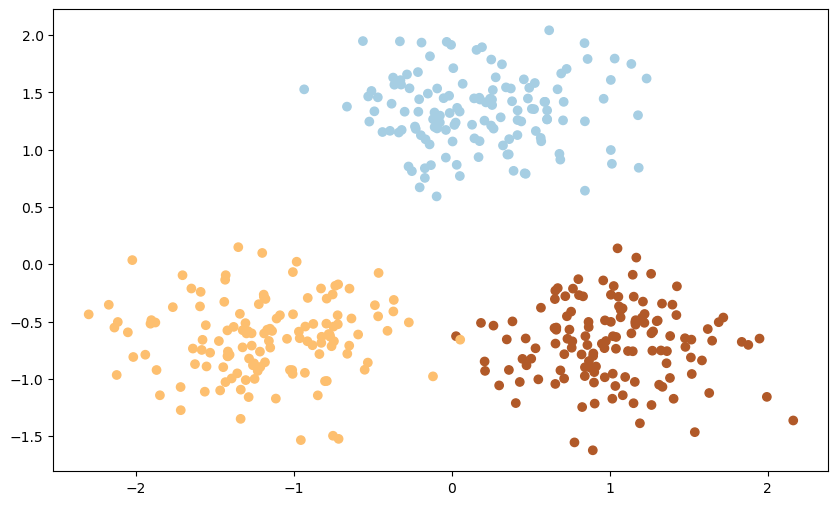

In [96]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

#Determine centroids
centers = [[0.5, 2], [-1, -1], [1.5, -1]]
#Create dataset
X, y = make_blobs(n_samples = 400, centers = centers, 
                  cluster_std = 0.5, random_state = 0)
#Normalize the values
X = StandardScaler().fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'Paired')

#### Імпортуйте клас DBSCAN.

#### Створіть об'єкт класу DBSCAN з параметрами __eps = 0.4__, __min_samples = 20__.

In [ ]:
# ваш код тут

DBSCAN(eps=0.4, min_samples=20)

#### Натренуйте створений об'єкт на датафреймі Х.

In [ ]:
# ваш код тут

DBSCAN(eps=0.4, min_samples=20)

#### Побудуйте графік з розподілом точок по кластерах.

In [ ]:
# ваш код тут

Text(0.5, 1.0, 'Clusters determined by DBSCAN')

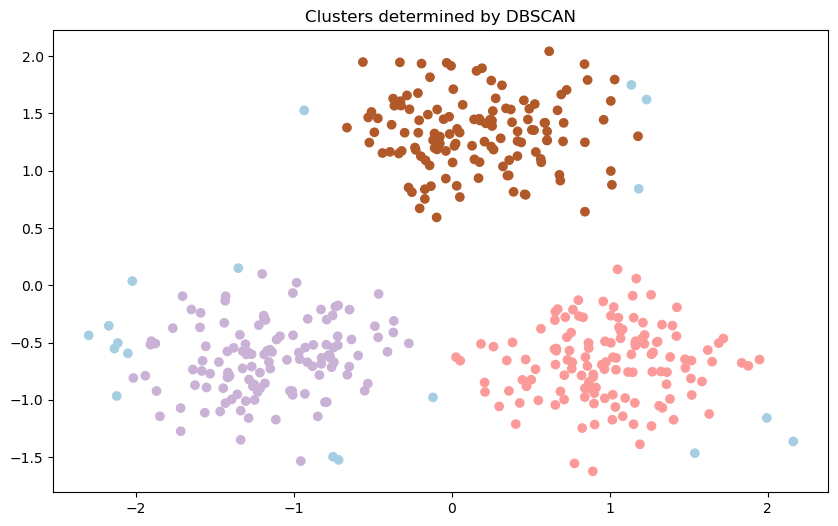

# PCA.
#### Для цієї частини лабораторної використайте датафрейм `wine`. Промасштабуйте дані з допомогою класу `StandardScaler` з пакету _sklearn_. Для цього використайте методи __fit()__ та __transform()__.

In [ ]:
# ваш код тут

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37386437]])

#### Створіть об'єкт класу `PCA`, який розкладе матрицю ознак по двох основних компонентах.

In [ ]:
# ваш код тут

PCA(n_components=2)

#### Натренуйте модель PCA на промасштабованих даних. Використайте методи __fit()__ та __transform()__.

In [ ]:
# ваш код тут

array([[-3.5229339 , -1.45309844],
       [-2.52885806,  0.33001925],
       [-2.78502898, -1.03693595],
       [-3.92258841, -2.76821026],
       [-1.40751111, -0.86777309],
       [-3.28812981, -2.13017513],
       [-2.75057754, -1.17916999],
       [-2.39286652, -1.61128232],
       [-2.79525633, -0.92317952],
       [-3.00559666, -0.79628417],
       [-3.67868855, -1.31252342],
       [-2.10963477, -0.61298199],
       [-2.43845636, -0.67852331],
       [-3.67349453, -1.14012136],
       [-4.44157575, -2.11031917],
       [-2.60892387, -1.66641801],
       [-2.47542846, -2.33089672],
       [-2.22623243, -1.63359016],
       [-3.74226929, -2.52840527],
       [-2.3944115 , -1.06452946],
       [-3.33656895, -0.79601279],
       [-1.48140399, -0.24008547],
       [-2.82806867,  0.08685755],
       [-2.00771405,  0.51561649],
       [-2.11463604,  0.31592057],
       [-1.39753751, -0.93821529],
       [-2.13348803, -0.68710205],
       [-1.62970383,  0.09118403],
       [-2.50760753,

#### Побудуйте графік розподілу точок по двох основних компонентах. Задайте параметр __c = wine['Customer_Segment']__.

In [ ]:
# ваш код тут

Text(0, 0.5, 'Другий основний компонент')

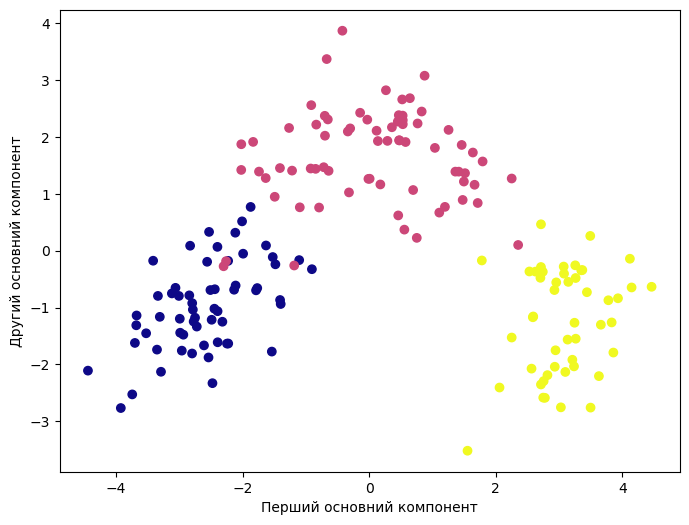

# SVD.
#### Для цієї частини лабораторної використайте датафрейм `wine`. Промасштабуйте дані з допомогою класу `StandardScaler` з пакету `sklearn`. Для цього використайте методи __fit()__ та __transform()__.

In [ ]:
# ваш код тут

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37386437]])

#### Створіть об'єкт класу `TruncatedSVD`, який розкладе матрицю ознак по двох основних компонентах.

In [ ]:
# ваш код тут

TruncatedSVD()

#### Натренуйте модель TruncatedSVD на промасштабованих даних. Використайте методи __fit()__ та __transform()__.

In [ ]:
# ваш код тут

array([[-3.5229339 , -1.45309842],
       [-2.52885806,  0.33001927],
       [-2.78502898, -1.03693596],
       [-3.92258841, -2.76821025],
       [-1.40751111, -0.8677731 ],
       [-3.28812981, -2.13017514],
       [-2.75057754, -1.17916996],
       [-2.39286652, -1.6112823 ],
       [-2.79525633, -0.92317954],
       [-3.00559666, -0.79628416],
       [-3.67868855, -1.31252342],
       [-2.10963477, -0.612982  ],
       [-2.43845636, -0.67852331],
       [-3.67349453, -1.14012137],
       [-4.44157575, -2.11031916],
       [-2.60892387, -1.666418  ],
       [-2.47542846, -2.33089674],
       [-2.22623243, -1.63359019],
       [-3.74226929, -2.52840527],
       [-2.3944115 , -1.06452946],
       [-3.33656895, -0.79601278],
       [-1.48140399, -0.24008546],
       [-2.82806867,  0.08685757],
       [-2.00771405,  0.51561651],
       [-2.11463604,  0.31592058],
       [-1.39753751, -0.93821529],
       [-2.13348803, -0.68710205],
       [-1.62970383,  0.09118402],
       [-2.50760753,

#### Побудуйте графік розподілу точок отриманих після декомпозиції. Задайте параметр __c = wine['Customer_Segment']__.

In [ ]:
# ваш код тут

Text(0, 0.5, 'Другий основний компонент')

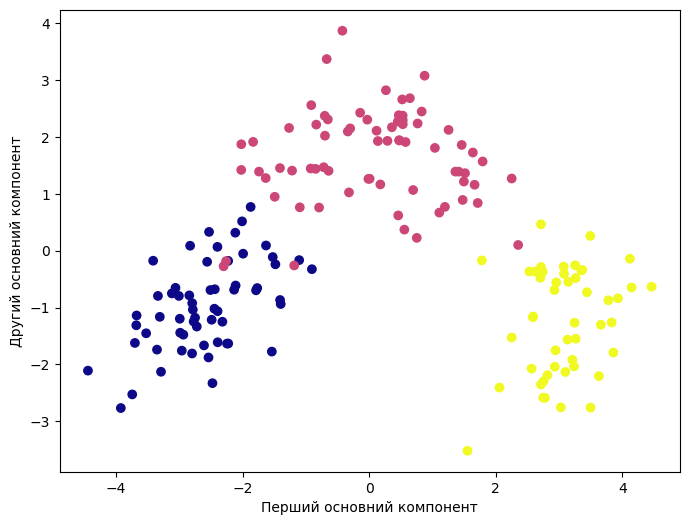